# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [3]:
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

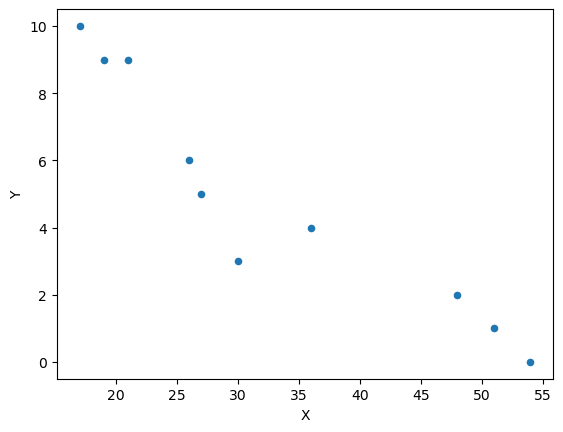

In [4]:
student_data.plot.scatter(x='X',y='Y')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# From the scatter plot it looks like the lower is the age the higher is the amount of tardies.
# In addition, the points scattering suggests that they may fit in a linear realtion.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
#Covariance:
display( student_data.cov() )


#Pearson Correlation Coefficient:
print( student_data['X'].corr(student_data['Y']) )


,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


-0.9391626886887122


In [ ]:
# The sign covariance (if it is not 'too small') gives information on the kind of linear relation that could have
# the two variables, i.e., directly or inversely proportional. However, it does not give information on how stong
# this correlation could be.

# On the other side, the Pearsson coefficient noramlises the covariance in such a way that it becomes a number
# in the range [-1,1], which gives information on how strong is the linear correaltion between the two variables. 

# We get a Cov(X,Y) = -45.57 < 0, which suggests that if the two variables are linearly related, then this should
# be in a inversely proportional way. We don't know though how strong could be this relation.

# The Pearson coefficient is very close to -1, which suggests that the two variables are strongly correlated in a
# linear way. The sign of the coefficient suggests that the relation is inversely proportional.

# Summarising the previous information, we can assert the the two variables are linearly correlated and inversely
# proportional.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Since we are very convinced that the two variables are linearly correlated, we use linear regression.

from sklearn import linear_model

model = linear_model.LinearRegression()

x = student_data[['X']]
y = student_data['Y']

result = model.fit(x,y)

type(result) #We see that the output variable is a Linear Regression model.

sklearn.linear_model._base.LinearRegression

Plot your regression model on your scatter plot.

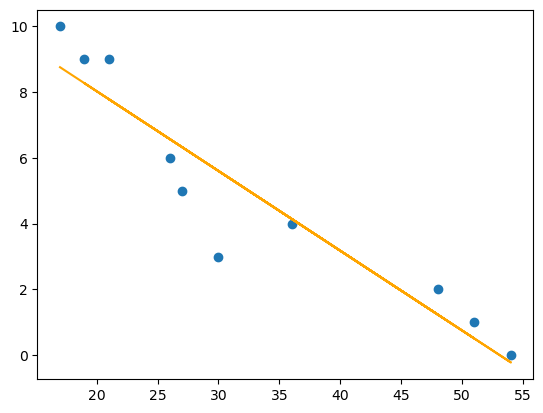

In [10]:
regression_line = result.intercept_ + result.coef_[0]*x # Building the predicted values for y.

plt.plot(x, regression_line, c = 'orange') # Plotting the regression line.

plt.scatter(x,y) # Plotting the original data.

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# As a conclusion, we see that our original data fits very well in the linear model built from liner regression.

# We can hence claim that the initial hypothesis is well-suited to reality, and assure that age is a good predictor
# for tardiness.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [28]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [29]:
# Keeping only the columns we will use in our study.
vehicles = vehicles[['Year', 'Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [30]:
vehicles.dtypes

Year                         int64
Cylinders                  float64
Fuel Barrels/Year          float64
Combined MPG                 int64
Fuel Cost/Year               int64
CO2 Emission Grams/Mile    float64
dtype: object

In [31]:
#vehicles[['Year', 'Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']].corr(vehicles['CO2 Emission Grams/Mile'])

correlations = vehicles.corr()['CO2 Emission Grams/Mile']
display(correlations)

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [33]:
vehicles.columns

Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year', 'CO2 Emission Grams/Mile'],
      dtype='object')

In [ ]:
# With the information we have so far, the better variable to determining the CO2 emissions will be that with
# a Pearsson coefficient closest to 1 in absolute value.

# Hence, the better candidate would be 'Fuel Barrels/Year'.

# In the opposite direction, the least useful variable to determining the CO2 emissions will be that with
# a Pearsson coefficient closest to 0.

# Hence, the worst candidate would be 'Year'.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [38]:
# Looking at the correlation coefficients, they suggest that the varibles 'Fuel Barrels/Year', 'Combined MPG' and
# 'Fuel Cost/Year' have a strong linear correlation with 'CO2 Emission Grams/Mile'.

# Hence we will use a multilinear regression with the mentioned variables, having 'CO2 Emission Grams/Mile' as the
# dependent variable.

model = linear_model.LinearRegression()

x = vehicles[['Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

result = model.fit(x,y)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [64]:
#Computing R^2 coefficient to check howe accurate is the model.

print(f'Model: y = {round(result.intercept_,2)} + ({round(result.coef_[0],2)}) x_1 + ({round(result.coef_[1],2)}) x_2 + ({round(result.coef_[2],2)}) x_3')

from sklearn.metrics import mean_squared_error

r2_error = result.score(x,y)

print(f'The R^2 error is {round(r2_error,2)}')


Model: y = 131.67 + (19.7) x_1 + (-3.17) x_2 + (0.03) x_3
The R^2 error is 0.98


In [ ]:
# The coefficients suggest a linear correlation between 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'
# and 'CO2 Emission Grams/Mile'.

# The R^2 coefficient is very close to 1, which suggest that the model is quite accurate. Hence I would trust 
# this model obtained from multilinear regression to predict other values of CO2 emissions.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [25]:
# Creating the DataFrame

df = pd.DataFrame({
    'Invitations' : [1, 3, 4, 6, 8, 9, 11, 14],
    'Attendance' : [1, 2, 4, 4, 5, 7, 8, 13]
    })

df

,Invitations,Attendance
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

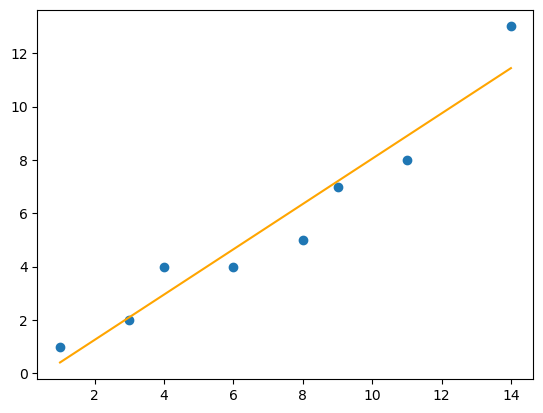

In [26]:
# Defining x,y values
x = df[['Invitations']] # Independent variable
y = df['Attendance']    # Dependent variable

# Plotting the original data.
plt.scatter(x,y) 

#Creating the regression model
model = linear_model.LinearRegression()
result = model.fit(x,y)

# Building the predicted values for y.
regression_line = result.intercept_ + result.coef_[0]*x

# Plotting the regression line.
plt.plot(x, regression_line, c = 'orange')

plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

r2_error = result.score(x,y)

r2_error

0.9316696375519905

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# From the plot we can see that the regression line might be a good model to approximate the data,
# except for the point (14, 13), which appears to be far from the line.

# In any case, the R^2 error is very close to 1, which indicates that the regression model is quite accurate.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [28]:
# We drop the point (14, 13) which looks it is not well approximated by the regression line.

modified_df = df.drop(df.index[-1])
modified_df

,Invitations,Attendance
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


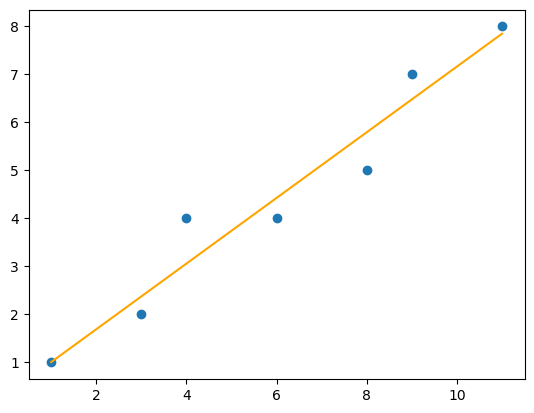

In [29]:
# Defining x,y values
x = modified_df[['Invitations']] # Independent variable
y = modified_df['Attendance']    # Dependent variable

# Plotting the original data.
plt.scatter(x,y) 

#Creating the regression model
model = linear_model.LinearRegression()
result = model.fit(x,y)

# Building the predicted values for y.
regression_line = result.intercept_ + result.coef_[0]*x

# Plotting the regression line.
plt.plot(x, regression_line, c = 'orange')

plt.show()

In [30]:
r2_error = result.score(x,y)

r2_error

0.9433811802232854

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# We see know that the regression line is more accurate than before, since we dropped the
# problematic data point.

# In addition, we see that the R^2 coefficient has increased getting hence a better linear prediction
# of the data.


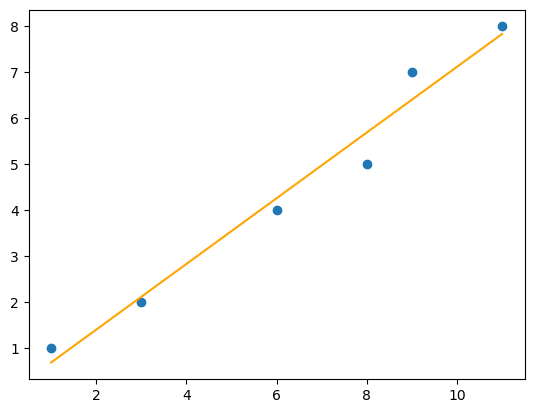

R^2 error:  0.9723364485981308


In [34]:
# If in addition we remove the point (4,4) we even get a more accurate model:

re_modified_df = modified_df.drop(modified_df.index[2])


# Defining x,y values
x = re_modified_df[['Invitations']] # Independent variable
y = re_modified_df['Attendance']    # Dependent variable

# Plotting the original data.
plt.scatter(x,y) 

#Creating the regression model
model = linear_model.LinearRegression()
result = model.fit(x,y)

# Building the predicted values for y.
regression_line = result.intercept_ + result.coef_[0]*x

# Plotting the regression line.
plt.plot(x, regression_line, c = 'orange')

plt.show()

print('R^2 error: ',result.score(x,y))